# Типы корреляций. Ранговые корреляции

*В прошлом юните вы узнали, что коэффициент корреляции Пирсона может быть рассчитан для непрерывных нормально распределённых признаков. В этом юните мы рассмотрим методы расчёта для остальных типов признаков.*

***Ранговая корреляция*** *— это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения.*

***Ранги*** *— это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную ***прямую связь***, а полная противоположность рангов — максимально тесную* ***обратную связь***

## Корреляция Спирмена

***Коэффициент корреляции Спирмена*** *используется для вычисления взаимосвязей между категориальными переменными.*

*Чтобы рассчитать коэффициент корреляции Спирмена, вам необходимо передать в df.corr() аргумент method = 'spearman' .*

In [2]:
import pandas as pd
import statistics
wine_data = pd.read_csv('data/wine_cleared.csv', sep=',')
display(wine_data.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'taster_name', 'taster_twitter_handle',
       'title', 'variety', 'winery'],
      dtype='object')

### Задание 5.1

*Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.*

In [4]:
mask = wine_data[['price','points']]
display(round(mask.corr(method = 'spearman'),2))

,price,points
price,1.00,0.58
points,0.58,1.00


*Но разве мы не допустили ошибку, рассчитав коэффициент корреляции Спирмена для числового признака, а не категориального?*

*Не совсем. Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь.*

*Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций.*

***Например, в нашем случае один из признаков price распределён ненормально, связь между ними также не является линейной. Корреляция по Пирсону составляет 0.4, что говорит о слабой связи признаков. А корреляция по Спирмену составляет 0.58, что говорит о более сильной связи.***

*Скорее всего, корреляция Спирмена в данном случае будет более верным вариантом, но для точного ответа нам необходимо будет удовлетворить условиям корреляции Спирмена или корреляции Пирсона. Для этого будут необходимы преобразования, которые мы изучим в следующих модулях EDA.*

*Так же, как и коэффициент Пирсона, коэффициент Спирмена распределён [-1; 1] с такой же интерпретацией силы связи, рассмотренной нами в предыдущих юнитах.*

*Для ранговой корреляции существует ещё один метод расчёта — корреляция Кендалла.*

## Корреляция Кендалла

*Так же, как и корреляция Спирмена, корреляция Кендала предусмотрена для нахождения взаимосвязей между категориальными переменными. Для расчёта коэффициента корреляции Кендалла необходимо передать в изученный нами метод df.corr() аргумент method = 'kendall'.*

### Задание 5.2

*Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.*

In [5]:
mask = wine_data[['price','points']]
display(round(mask.corr(method = 'kendall'),2))

,price,points
price,1.00,0.43
points,0.43,1.00


*Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена.*

*В нашем случае корреляция Кендалла равна 0.43 при коэффициенте корреляции Спирмена 0.58, однако она всё так же выше коэффициента корреляции Пирсона, что говорит о большей связи, чем в вычислении по Пирсону.*

*Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.*

***В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.***

*Даже такой грубый анализ без учёта всех условий для корреляций может быть полезен и позволяет сделать предварительные выводы для дальнейшей работы с признаками.*

## Корреляция Мэтьюса

*Бинарные признаки являются подгруппой категориальных. Мы по-прежнему можем использовать методы ранговых корреляций для расчёта связи между переменными.*

*Кроме этого, существует ***корреляция Мэтьюса*** — мера силы связи между бинарными переменными.*

*В df.corr() нет расчёта для корреляции Мэтьюса, но мы можем воспользоваться библиотекой scikit-learn и её функцией [matthews_corrcoef()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef) для расчёта коэффициента корреляции Мэтьюса.*

***scikit-learn***— это библиотека с реализацией готовых алгоритмов для машинного обучения. Более подробно вы познакомитесь с ней в модулях, посвящённых машинному обучению.*

*Для начала установим библиотеку scikit-learn.*

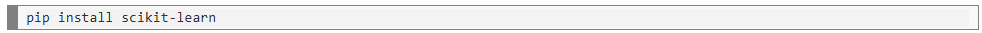

*Затем импортируем нужную нам функцию для дальнейшей работы.*



*В нашем датасете винных обзоров нет бинарных переменных, но мы можем воспользоваться учебным примером.*

***Пример. Создадим два случайных признака x, y и зададим им бинарные значения.***

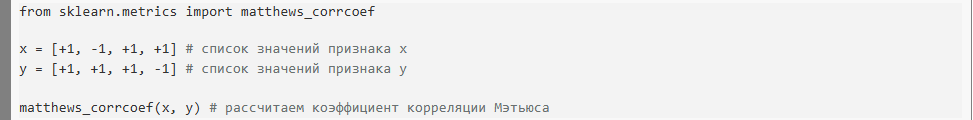

### Задание 5.3

*Выполните приведённый выше код и выпишите получившееся значение коэффициента корреляции Мэтьюса. Округлите ответ до сотых.*


In [2]:
import sklearn

In [7]:
print(dir(sklearn))
print(dir(sklearn.linear_model))

['calibration', 'clone', 'cluster', 'compose', 'config_context', 'covariance', 'cross_decomposition', 'datasets', 'decomposition', 'discriminant_analysis', 'dummy', 'ensemble', 'exceptions', 'experimental', 'externals', 'feature_extraction', 'feature_selection', 'frozen', 'gaussian_process', 'get_config', 'impute', 'inspection', 'isotonic', 'kernel_approximation', 'kernel_ridge', 'linear_model', 'manifold', 'metrics', 'mixture', 'model_selection', 'multiclass', 'multioutput', 'naive_bayes', 'neighbors', 'neural_network', 'pipeline', 'preprocessing', 'random_projection', 'semi_supervised', 'set_config', 'show_versions', 'svm', 'tree']
['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'GammaRegressor', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'LogisticRegression', 'LogisticRegressionCV', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursu

In [7]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

round(matthews_corrcoef(x, y), 2) # рассчитаем коэффициент корреляции Мэтьюса

np.float64(-0.33)

*Коэффициент корреляции Мэтьюса может быть полезен в случае, когда в датасете представлены только бинарные переменные. Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны.*

*Например, при предсказании дефолтности клиента у нас может быть только два исхода: 1 — дефолт, 0 — не дефолт. Подробнее об оценке моделей вы узнаете дальше, в модулях, посвящённых машинному обучению.*

*Итак, этом юните мы узнали о ранговых корреляциях для категориальных признаков, а также о корреляции для бинарных признаков. В следующем юните мы изучим визуализацию корреляций.*

*Предлагаем вам ответить на несколько вопросов, чтобы закрепить пройденный материал. ⬇️*

### Задание 5.4

*Какие из коэффициентов корреляции могут использоваться «по правилам» для категориальных переменных?*

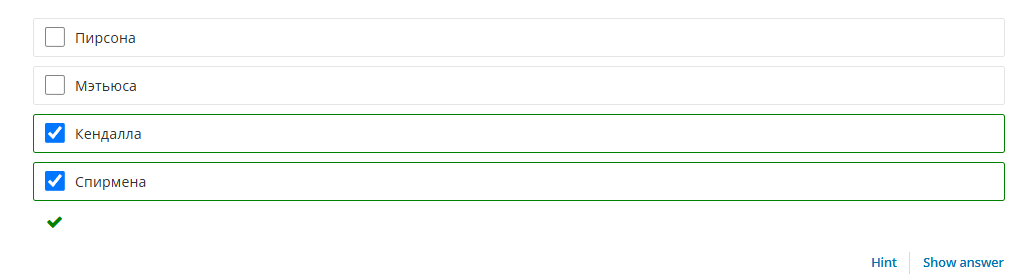

### Задание 5.5

*Какие из коэффициентов корреляции могут использоваться «по правилам» для бинарных переменных?*

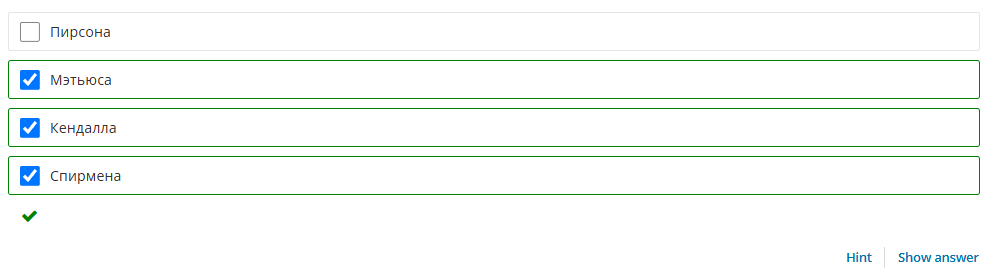